# Tutorial

## Prerequisites.

#### Download and install Miniconda, Anaconda, or Conda.

https://docs.conda.io/en/latest/miniconda.html

### Create the Conda environment.

```
conda env create --file conda\win.yml
conda activate tyche
pip install mip
```

#### Activate the Tyche environment.

```
conda activate tyche
```

## Set up.

### Import packages.

#### Import the system packages.

In [1]:
import os
import sys

#### Add the main Tyche packages to the search path.

In [2]:
sys.path.insert(0, os.path.abspath("../../../src"))

#### Import tyche and related packages.

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

## Example problem: wind turbines.

Here is a highly simplified and approximate model for a wind turbine.

### Environmental constants.

*   Wind sheer exponent: $\alpha = 0.16$

### Scale of operations.

*   Project scale: $S$.
*   Rotor diameter: $R = 70 \cdot S^\frac{1}{2+3\alpha} ~\textrm{m}$.
*   Hub height: $H = 65 \cdot S^\frac{1}{2+3\alpha} ~\textrm{m}$.
*   Machine rating: $M = 1500 \cdot S ~\textrm{kW}$. 

### Production.

*   Annual energy production: $4312 \cdot S ~\textrm{MWh}$

### Design parameters.

*   Rotor design: $\rho \in [0, 1]$, with $\rho_0 = 0$.
*   Drive design: $\delta \in [0.8, 0.90]$, with $\delta_0 = 0.90$.
*   Tower design: $\tau \in [0.5, 1.0]$, with $\tau_0 = 1.0$.
*   BOS factor: $\beta \in [0.5, 1.0]$, with $\beta_0 = 1.0$.
*   O&M factor: $\mu \in [0.5, 1.0]$, with $\mu_0 = 1.0$.

### Costs.

*   Rotor: $1.6 \cdot R^{2.8} - 60000 \cdot \rho ~\textrm{USD}$.
*   Drive, nacelle, systems: $900 \cdot M^\delta ~\textrm{USD}$.
*   Tower: $0.015 \cdot R^{2.8} \cdot H^\tau ~\textrm{USD}$.
*   Balance of system: $250 \cdot \beta \cdot M ~\textrm{USD}$.
*   Replacements: $10.6 \cdot M ~\textrm{USD}$.
*   O&M: $20 \cdot \mu \cdot M ~\textrm{USD}$.
*   Land lease: $3.5 \cdot M ~\textrm{USD}$.

### Metrics.

*   Capacity factor: $32.82~\%$

## Design the technology model.

### Technology name.

Choose a unique name for the technology being modeled. *In this example we'll call the technology `Wind Turbine`.*

Also choose a unique name for the default, reference, or base-case scenario. *In this example, we'll call the default scenario `Reference`.*

### Dimensions and indices.

Decide which quantities will be tracked as indices in the model, and settle on their units of measurment and default values:
1.  Types of capital costs. *In this example we have . . .*
    *   Rotor
    *   Drive
    *   Tower
    *   BOS
2.  Types of fixed cost. *In this example we have . . .*
    *   Replacements
    *   O&M
    *   Land
3.  Inputs to the process. *In this example we have . . .*
    *   Wind
4.  Outputs from the process. *In this example we have . . .*
    *   Electricity
5.  Metrics. *In this example we have . . .*
    *   Cost
    *   LCOE
    *   CF
    *   AEP
6.  Parameters. *In this example we have . . .*
    *   Rotor design ($\rho$)
    *   Drive design ($\delta$)
    *   Tower design ($\tau$)
    *   BOS factor ($\beta$)
    *   O&M factor ($\mu$)

Note that in each category, the numeric indices for each item are numbered with integers starting from zero.

See the [model](https://tyche.live/doc-src/formulation.html) and [database](https://tyche.live/doc-src/database.html) documentation for more details.

### Create the `indices` table.

Enter the data for your model in the comma-delimited-value file [tutorial/data/indices.csv](data/).

Check to see that the data file reads correctly:

In [4]:
my_designs = ty.Designs(path = ".",
                        name = 'tutorial-basic.xlsx')
my_designs.indices.reset_index("Index").sort_values(["Type", "Offset"])

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Index  Offset  \
Technology   Type                           
Wind Turbine Capital        Rotor       0   
             Capital        Drive       1   
             Capital        Tower       2   
             Capital          BOS       3   
             Input           Wind       0   
             Metric          Cost       0   
             Metric          LCOE       1   
             Metric            CF       2   
             Metric           AEP       3   
             Output   Electricity       0   

                                                            Description Notes  
Technology   Type                                                              
Wind Turbine Capital        Rotor blades, hub, bearings, spinner, nose.   NaN  
             Capital  Drive, gearbox, bearings, electronics, frame, ...   NaN  
             Capital                                         The tower.   NaN  
             Capital                    Foundations, roads, civil work.   NaN  
             Input    Just a placeholder because at least one input ...   NaN  
             Metric                           Cost of the wind turbine.   NaN  
             Metric                           Levelized cost of energy.   NaN  
             Metric                                    Capacity factor.   NaN  
             Metric                           Annual energy production.   NaN  
             Output                               Annual energy output.   NaN

Check your `indices` table against the following:

In [5]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')
answers_designs.indices.reset_index("Index").sort_values(["Type", "Offset"])

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Index  Offset  \
Technology   Type                           
Wind Turbine Capital        Rotor       0   
             Capital        Drive       1   
             Capital        Tower       2   
             Capital          BOS       3   
             Input           Wind       0   
             Metric          Cost       0   
             Metric          LCOE       1   
             Metric            CF       2   
             Metric           AEP       3   
             Output   Electricity       0   

                                                            Description Notes  
Technology   Type                                                              
Wind Turbine Capital        Rotor blades, hub, bearings, spinner, nose.   NaN  
             Capital  Drive, gearbox, bearings, electronics, frame, ...   NaN  
             Capital                                         The tower.   NaN  
             Capital                    Foundations, roads, civil work.   NaN  
             Input    Just a placeholder because at least one input ...   NaN  
             Metric                           Cost of the wind turbine.   NaN  
             Metric                           Levelized cost of energy.   NaN  
             Metric                                    Capacity factor.   NaN  
             Metric                           Annual energy production.   NaN  
             Output                               Annual energy output.   NaN

### Create the `results` table.

Enter the data for the units of measure in your model in the comma-delimited-value file [tutorial/data/results.csv](data/).

Check to see that the data file reads correctly:

In [6]:
my_designs = ty.Designs(path = ".",
                        name = 'tutorial-basic.xlsx')
my_designs.results

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Units Notes
Technology   Variable Index                              
Wind Turbine Cost     Cost                $/turbine   NaN
             Metric   AEP          MWh/turbine/year   NaN
                      CF                      %/100   NaN
                      Cost           $/turbine/year   NaN
                      LCOE                    $/kWh   NaN
             Output   Electricity       kWh/turbine   NaN

Check your `results` table against the following:

In [7]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')
answers_designs.results

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Units Notes
Technology   Variable Index                              
Wind Turbine Cost     Cost                $/turbine   NaN
             Metric   AEP          MWh/turbine/year   NaN
                      CF                      %/100   NaN
                      Cost           $/turbine/year   NaN
                      LCOE                    $/kWh   NaN
             Output   Electricity       kWh/turbine   NaN

### Create the `designs` table.

In order to introduce stochasticity into the reference case, let's assume that the turbine lifetime is a triangular distribution from 8 years to 10 years, with a mode of 8.6 years. We use [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) for probability distributions and the function `triang` is described [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang). Prefix calls to `scipy.stats` with `st.`, to this triangular distribution is entered into the design table as `st.triang(0.3, 8.0, 2.0)`.

Enter the data for your model in the comma-delimited-value file [tutorial/data/designs.csv](data/).

Check to see that the data file reads correctly:

In [8]:
my_designs = ty.Designs(path = ".",
                        name = 'tutorial-basic.xlsx')
my_designs.designs.reset_index(["Variable", "Index"]).sort_values(["Variable", "Index"])

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Variable Index Value  Units  \
Technology   Tranche                                         
Wind Turbine Casual Drive R&D     Input  Wind    10    m/s   
             Casual Rotor R&D     Input  Wind    10    m/s   
             Casual Tower R&D     Input  Wind    10    m/s   
             Drive Reference      Input  Wind    10    m/s   
             Focused Drive R&D    Input  Wind    10    m/s   
...                                 ...   ...   ...    ...   
             Intense Drive R&D    Scale   NaN     1  %/100   
             Intense Rotor R&D    Scale   NaN     1  %/100   
             Intense Tower R&D    Scale   NaN     1  %/100   
             Rotor Reference      Scale   NaN     1  %/100   
             Tower Reference      Scale   NaN     1  %/100   

                                                                            Notes  
Technology   Tranche                                                               
Wind Turbine Casual Drive R&D                            Wind speed at 50 meters.  
             Casual Rotor R&D                            Wind speed at 50 meters.  
             Casual Tower R&D                            Wind speed at 50 meters.  
             Drive Reference                             Wind speed at 50 meters.  
             Focused Drive R&D                           Wind speed at 50 meters.  
...                                                                           ...  
             Intense Drive R&D  Scale of operations, relative to a 1.5MW turbine.  
             Intense Rotor R&D  Scale of operations, relative to a 1.5MW turbine.  
             Intense Tower R&D  Scale of operations, relative to a 1.5MW turbine.  
             Rotor Reference    Scale of operations, relative to a 1.5MW turbine.  
             Tower Reference    Scale of operations, relative to a 1.5MW turbine.  

[120 rows x 5 columns]

Check your `designs` table against the following:

In [9]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')
answers_designs.designs.xs("Tower Reference", level = "Tranche", drop_level = False).reset_index(["Variable", "Index"]).sort_values(["Variable", "Index"])

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Variable        Index  \
Technology   Tranche                                           
Wind Turbine Tower Reference              Input         Wind   
             Tower Reference   Input efficiency         Wind   
             Tower Reference        Input price         Wind   
             Tower Reference           Lifetime          BOS   
             Tower Reference           Lifetime        Drive   
             Tower Reference           Lifetime        Rotor   
             Tower Reference           Lifetime        Tower   
             Tower Reference  Output efficiency  Electricity   
             Tower Reference       Output price  Electricity   
             Tower Reference              Scale          NaN   

                                                 Value  Units  \
Technology   Tranche                                            
Wind Turbine Tower Reference                        10    m/s   
             Tower Reference                     0.593  %/100   
             Tower Reference                         0    NaN   
             Tower Reference  st.triang(0.3, 8.0, 2.0)   year   
             Tower Reference  st.triang(0.3, 8.0, 2.0)   year   
             Tower Reference  st.triang(0.3, 8.0, 2.0)   year   
             Tower Reference  st.triang(0.3, 8.0, 2.0)   year   
             Tower Reference                    0.3282  %/100   
             Tower Reference                         0  $/kWh   
             Tower Reference                         1  %/100   

                                                                          Notes  
Technology   Tranche                                                             
Wind Turbine Tower Reference                           Wind speed at 50 meters.  
             Tower Reference                                          Betz law.  
             Tower Reference                                      Wind is free.  
             Tower Reference         Reciprocal of the capital-recovery factor.  
             Tower Reference         Reciprocal of the capital-recovery factor.  
             Tower Reference         Reciprocal of the capital-recovery factor.  
             Tower Reference         Reciprocal of the capital-recovery factor.  
             Tower Reference                                   Capacity factor.  
             Tower Reference                              Not tracking revenue.  
             Tower Reference  Scale of operations, relative to a 1.5MW turbine.

### Create the `parameters` table.

Enter the data for your model in the comma-delimited-value file [tutorial/data/parameters.csv](data/).

Check to see that the data file reads correctly:

In [10]:
my_designs = ty.Designs(path = ".",
                        name = 'tutorial-basic.xlsx')
my_designs.parameters.reset_index("Parameter").sort_values("Offset")

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Parameter  Offset  \
Technology   Tranche                                   
Wind Turbine Tower Reference    Rotor design       0   
             Intense Drive R&D  Rotor design       0   
             Focused Tower R&D  Rotor design       0   
             Drive Reference    Rotor design       0   
             Intense Rotor R&D  Rotor design       0   
             Focused Rotor R&D  Rotor design       0   
             Casual Tower R&D   Rotor design       0   
             Intense Tower R&D  Rotor design       0   
             Focused Drive R&D  Rotor design       0   
             Rotor Reference    Rotor design       0   
             Casual Drive R&D   Rotor design       0   
             Casual Rotor R&D   Rotor design       0   
             Focused Rotor R&D  Drive design       1   
             Rotor Reference    Drive design       1   
             Intense Drive R&D  Drive design       1   
             Intense Tower R&D  Drive design       1   
             Casual Rotor R&D   Drive design       1   
             Focused Tower R&D  Drive design       1   
             Drive Reference    Drive design       1   
             Intense Rotor R&D  Drive design       1   
             Tower Reference    Drive design       1   
             Casual Drive R&D   Drive design       1   
             Focused Drive R&D  Drive design       1   
             Casual Tower R&D   Drive design       1   
             Focused Rotor R&D  Tower design       2   
             Intense Drive R&D  Tower design       2   
             Intense Tower R&D  Tower design       2   
             Rotor Reference    Tower design       2   
             Focused Tower R&D  Tower design       2   
             Intense Rotor R&D  Tower design       2   
             Tower Reference    Tower design       2   
             Casual Drive R&D   Tower design       2   
             Focused Drive R&D  Tower design       2   
             Casual Rotor R&D   Tower design       2   
             Drive Reference    Tower design       2   
             Casual Tower R&D   Tower design       2   
             Intense Tower R&D    BOS factor       3   
             Tower Reference      BOS factor       3   
             Casual Rotor R&D     BOS factor       3   
             Rotor Reference      BOS factor       3   
             Casual Tower R&D     BOS factor       3   
             Focused Tower R&D    BOS factor       3   
             Drive Reference      BOS factor       3   
             Casual Drive R&D     BOS factor       3   
             Intense Rotor R&D    BOS factor       3   
             Focused Drive R&D    BOS factor       3   
             Intense Drive R&D    BOS factor       3   
             Focused Rotor R&D    BOS factor       3   
             Drive Reference      O&M factor       4   
             Casual Tower R&D     O&M factor       4   
             Intense Tower R&D    O&M factor       4   
             Intense Drive R&D    O&M factor       4   
             Focused Drive R&D    O&M factor       4   
             Casual Rotor R&D     O&M factor       4   
             Rotor Reference      O&M factor       4   
             Focused Tower R&D    O&M factor       4   
             Casual Drive R&D     O&M factor       4   
             Tower Reference      O&M factor       4   
             Intense Rotor R&D    O&M factor       4   
             Focused Rotor R&D    O&M factor       4   

                                                                            Value  \
Technology   Tranche                                                                
Wind Turbine Tower Reference                                                    0   
             Intense Drive R&D                                                  0   
             Focused Tower R&D                                                  0   
             Drive Reference                                                    0   
             Intense Rotor R&D                      

Check your `parameters` table against the following:

In [11]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')
answers_designs.parameters.xs("Rotor Reference", level = "Tranche", drop_level = False).reset_index("Parameter").sort_values("Offset")

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Parameter  Offset Value Units  Notes
Technology   Tranche                                                 
Wind Turbine Rotor Reference  Rotor design       0     0     1    rho
             Rotor Reference  Drive design       1   0.9     1  delta
             Rotor Reference  Tower design       2     1     1    tau
             Rotor Reference    BOS factor       3     1     1   beta
             Rotor Reference    O&M factor       4     1     1     mu

## Implement the technology model.

The implementation of a technology model consists of a capital cost function, a fixed cost function, a production function, and a metrics function.

See the [model](https://tyche.live/doc-src/formulation.html) documentation for more details.

The [src/technology/](../src/technology/) folder has examples of several technology models.

#### Capital cost function.

The capital cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the capital costs for the technology.

Implement the capital cost function for your technology in the file [tutorial/my_technology.py](./).

In [12]:
def capital_cost(scale, parameter):
  """
  Capital cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """

  # Stack the costs for each category into a single array that we return.
  return np.stack([
      
  ])

Compare your function to the following:

In [13]:
def answers_capital_cost(scale, parameter):
  """
  Capital cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """

  # We aren't varying the wind sheer exponent.
  alpha = 0.16

  # It is handy to copy the elements of the parameter array into meaningful variable names.
  # Not all of these parameters are used in the calculations, but they are read in here for
  # demonstration purposes.
  # There can be as many or as few parameters as needed to implement the technology-specific
  # calculations.
  rho   = parameter[0]
  delta = parameter[1]
  tau   = parameter[2]
  beta  = parameter[3]
  mu    = parameter[4]

  # Compute the rotor diamter, hub height, and machine rating.
  r = 70 * scale**(1 / (2 + 3 * alpha))
  h = 65 * scale**(1 / (2 + 3 * alpha))
  m = 1500 * scale

  # Compute the components of capital cost.
  rotor = 1.6 * r**2.8 - 60000 * rho
  drive = 900 * m**delta
  tower = 0.015 * r**2.8 * h**tau
  bos   = 250 * beta * m

  # Stack the costs for each category into a single array that we return.
  return np.stack([
      rotor,
      drive,
      tower,
      bos,
  ])

Test this for the reference case:

In [14]:
example_capital = answers_capital_cost(1, [0, 0.9, 1, 1, 1])
example_capital

array([234635.91808147, 649717.61674841, 142981.2625809 , 375000.        ])

Interpretation:
*   Rotor: \$235k
*   Drive: \$649k
*   Tower: \$143k
*   BOS: \$375k

#### Fixed cost function.

The fixed cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the fixed costs for the technology.

Implement the fixed cost function for your technology in the file [tutorial/my_technology.py](./).

In [15]:
def fixed_cost(scale, parameter):
  """
  Capital cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """
  # Stack the costs for each category into a single array that we return.
  return np.stack([

  ])

Compare your function to the following:

In [16]:
def answers_fixed_cost(scale, parameter):
  """
  Capital cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """

  # We aren't varying the wind sheer exponent.
  alpha = 0.16

  # It is handy to copy the elements of the parameter array into meaningful variable names.
  rho   = parameter[0]
  delta = parameter[1]
  tau   = parameter[2]
  beta  = parameter[3]
  mu    = parameter[4]

  # Compute the rotor diamter, hub height, and machine rating.
  r = 70 * scale**(1 / (2 + 3 * alpha))
  h = 65 * scale**(1 / (2 + 3 * alpha))
  m = 1500 * scale

  # Compute the components of fixed cost.
  replacement            = 10.6 * m
  operations_maintenance = 20 * mu * m
  land_lease             = 3.5 * m

  # Stack the costs for each category into a single array that we return.
  return np.stack([
      replacement,
      operations_maintenance,
      land_lease
  ])

Test this for the reference case:

In [17]:
example_fixed = answers_fixed_cost(1, [0, 0.9, 1, 1, 1])
example_fixed

array([15900., 30000.,  5250.])

Interpretation:
*   Replacement: \$16k/yr
*   O&M: \$30k/yr
*   Land: \$5k/yr

#### Production function.

The production function takes the scale of the operations, the capital costs, the lifetime, the fixed costs, and the array of technology parameters as arguments and it returns the production (outputs) for the technology.

Implement the production function for your technology in the file [tutorial/my_technology.py](./).

In [18]:
def production(scale, capital, lifetime, fixed, input, parameter):
  """
  Production function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input : array
    Input quantities. 
  parameter : array
    The technological parameterization.
  """

  # Stack the output for each category into a single array that we return.
  return np.stack([

  ])

Compare your function to the following:

In [19]:
def answers_production(scale, capital, lifetime, fixed, input, parameter):
  """
  Production function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input : array
    Input quantities. 
  parameter : array
    The technological parameterization.
  """

  # We aren't varying the wind sheer exponent.
  alpha = 0.16

  # It is handy to copy the elements of the parameter array into meaningful variable names.
  rho   = parameter[0]
  delta = parameter[1]
  tau   = parameter[2]
  beta  = parameter[3]
  mu    = parameter[4]

  # Compute the production of electricity.
  electricity = 4312 * scale / 0.3282

  # Stack the output for each category into a single array that we return.
  return np.stack([
      electricity,
  ])

Test this for the reference case:

In [20]:
example_production = answers_production(
    1,                  # Scale
    example_capital,    # Capital
    [8.6, 8.6, 8.6],    # Lifetimes
    example_fixed,      # Fixed costs
    [0],                # Inputs
    [0, 0.9, 1, 1, 1],  # Parameters
)
example_production

array([13138.33028641])

Interpretation:
*   Rated annual production: 13 GW

#### Metric function.

The metric function takes information on costs, inputs, outputs, and parameters and it returns the metrics for the technology.

Implement the metrics function for your technology in the file [tutorial/my_technology.py](./).

In [21]:
def metrics(scale, capital, lifetime, fixed, input_raw, input, input_price, output_raw, output, cost, parameter):
  """
  Metrics function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input_raw : array
    Raw input quantities (before losses).
  input : array
    Input quantities. 
  output_raw : array
    Raw output quantities (before losses).
  output : array
    Output quantities. 
  cost : array
    Costs.
  parameter : array
    The technological parameterization.
  """

  # Package results.
  return np.stack([

  ])

Compare your function to the following:

In [22]:
def answers_metrics(scale, capital, lifetime, fixed, input_raw, input,input_price, output_raw, output, cost, parameter):
  """
  Metrics function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input_raw : array
    Raw input quantities (before losses).
  input : array
    Input quantities. 
  output_raw : array
    Raw output quantities (before losses).
  output : array
    Output quantities. 
  cost : array
    Costs.
  parameter : array
    The technological parameterization.
  """

  # We aren't varying the wind sheer exponent.
  alpha = 0.16

  # It is handy to copy the elements of the parameter array into meaningful variable names.
  rho   = parameter[0]
  delta = parameter[1]
  tau   = parameter[2]
  beta  = parameter[3]
  mu    = parameter[4]

  # Compute the metrics.
  lcoe = cost / output[0] / 1000
  cf = output[0] / output_raw[0]
  aep = output[0]

  # Package results.
  return np.stack([
    cost,
    lcoe,
    cf  ,
    aep ,
  ])

Test this for the reference case:

In [23]:
example_metrics = answers_metrics(
    1,                 # Scale
    example_capital,   # Capital
    [8.6, 8.6, 8.6],   # Lifetimes
    example_fixed,     # Fixed costs
    [0],               # Input_raw (idealized amount)
    [0],               # Input (accounting for losses)
    [0],               # Input price (wind is free)
    example_production,                              # Output_raw (idealized amount)
    example_production * 0.3282,                     # Output (accounting for losses)
    sum(example_capital / 8.6) + sum(example_fixed), # Cost
    [0, 0.9, 1, 1, 1], # Parameters
)
example_metrics

array([2.14212186e+05, 4.96781507e-02, 3.28200000e-01, 4.31200000e+03])

Interpretation:
*   Levelized cost: \$214k/yr
*   LCOE: \$0.05/kWh
*   Capacity factor: 32.82%
*   Annual energy production: 4312 MWh/yr

### Create the `functions` table.

Enter the technology name and any notes for your model in the comma-delimited-value file [tutorial/data/functions.csv](data/). You can also edit the module or function names in this table, if you changed them.

Check to see that the data file reads correctly:

In [24]:
my_designs = ty.Designs(path = ".",
                        name = 'tutorial-basic.xlsx')
my_designs.functions

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


,Style,Model,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Wind Turbine,numpy,tutorial_basic,capital_cost,fixed_cost,production,metrics,NaN


Compare your `functions` table to the following:

In [25]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')
answers_designs.functions

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


,Style,Model,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Wind Turbine,numpy,tutorial_basic,capital_cost,fixed_cost,production,metrics,NaN


## Simulate the base case or reference scenario.

### Load the data.

In [26]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


### Compile the production and metric functions for each technology in the dataset.

In [27]:
answers_designs.compile()

Recall that the lifetime of the wind turbine is a random variable. Let's compute an ensemble of 1000 simulations for the reference case.

In [28]:
answers_reference = answers_designs.evaluate_tranche_impacts(
    sample_count=2
).xs(
    "Rotor Reference",
    level = "Tranche",
    drop_level = False
)
answers_reference

Evaluating Wind Turbine


Value  \
Technology   Tranche         Sample Variable Index                        
Wind Turbine Rotor Reference 1      Cost     Cost         208193.131882   
                                    Metric   AEP            4312.000000   
                                             CF                0.328200   
                                             Cost         208193.131882   
                                             LCOE              0.048282   
                                    Output   Electricity    4312.000000   
                             2      Cost     Cost         218396.490930   
                                    Metric   AEP            4312.000000   
                                             CF                0.328200   
                                             Cost         218396.490930   
                                             LCOE              0.050649   
                                    Output   Electricity    4312.000000   

                                                                     Units  
Technology   Tranche         Sample Variable Index                          
Wind Turbine Rotor Reference 1      Cost     Cost                $/turbine  
                                    Metric   AEP          MWh/turbine/year  
                                             CF                      %/100  
                                             Cost           $/turbine/year  
                                             LCOE                    $/kWh  
                                    Output   Electricity       kWh/turbine  
                             2      Cost     Cost                $/turbine  
                                    Metric   AEP          MWh/turbine/year  
                                             CF                      %/100  
                                             Cost           $/turbine/year  
                                             LCOE                    $/kWh  
                                    Output   Electricity       kWh/turbine

Here is a violin plot for the LCOE:

<Axes: xlabel='Value'>

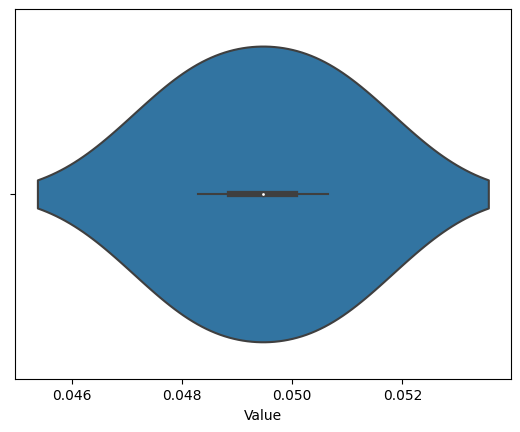

In [29]:
answers_reference_plot = answers_reference.reset_index()
sb.violinplot(
    x=answers_reference_plot.loc[answers_reference_plot.Index=='LCOE']['Value']
)

## Simulate effects of R&D.

### Expert elicitation

Let's say that we interview experts about three intensities of R&D investment in each of rotor, drive, and tower design. They provide us with triangular probability distributions for the $\rho$, $\delta$, and $\tau$ parameters. Furthermore, let's say that they disagree on the results of intense R&D on tower design, where 70% of the experts provide a more optimistic assessment.

In [30]:
answers_designs.parameters.iloc[
    answers_designs.parameters.index.get_level_values(2).isin(
        ["Rotor design", "Drive design", "Tower design"]
    )
]

Offset  \
Technology   Tranche           Parameter              
Wind Turbine Casual Drive R&D  Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Casual Rotor R&D  Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Casual Tower R&D  Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Drive Reference   Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Focused Drive R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Focused Rotor R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Focused Tower R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Intense Drive R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Intense Rotor R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Intense Tower R&D Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Rotor Reference   Drive design       1   
                               Rotor design       0   
                               Tower design       2   
             Tower Reference   Drive design       1   
                               Rotor design       0   
                               Tower design       2   

                                                                                         Value  \
Technology   Tranche           Parameter                                                         
Wind Turbine Casual Drive R&D  Drive design                         st.triang(0.5, 0.87, 0.03)   
                               Rotor design                                                  0   
                               Tower design                                                  1   
             Casual Rotor R&D  Drive design                                                0.9   
                               Rotor design                           st.triang(0.5, 0.0, 0.4)   
                               Tower design                                                  1   
             Casual Tower R&D  Drive design                                                0.9   
                               Rotor design                                                  0   
                               Tower design                           st.triang(0.5, 0.8, 0.2)   
             Drive Reference   Drive design                                                0.9   
                               Rotor design                                                  0   
                               Tower design                                                  1   
             Focused Drive R&D Drive design                         st.triang(0.5, 0.84, 0.06)   
                               Rotor design                                                  0   
                               Tower design                                                  1   
             Focused Rotor R&D Drive design                                                0.9   
                               Rotor design                           st.triang(0.5, 0.3, 0.4)   
                               Tower design                                                 

### Simulating implications of expert elicitation.

In [31]:
answers_experts = answers_designs.evaluate_tranche_impacts(sample_count=2)
answers_experts.to_csv('chk.csv')

Evaluating Wind Turbine


Make violin plots showing the implications of the expert opinions

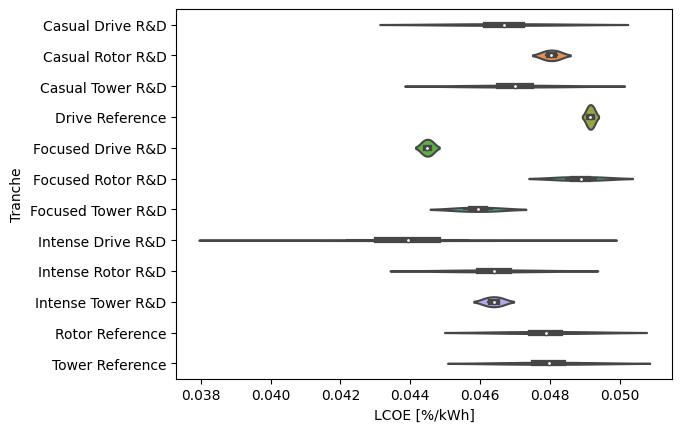

In [32]:
sb.violinplot(
    y = "Tranche",
    x = "Value",
    data = answers_experts.xs(
        ("Wind Turbine", "Metric", "LCOE"),
        level = ("Technology", "Variable", "Index")
    ).reset_index()
).set(xlabel = "LCOE [%/kWh]");

## Analyzing investments.

### Base case.

#### Create the `tranches` table.

To get started, we just want to create on tranche and one category for the base case or reference scenario.

Edit the name of the reference case for your model in the comma-delimited-value file [tutorial/data/tranches.csv](data/).

Check to see that the data file reads correctly:

In [33]:
my_investments = ty.Investments(path = ".",
                                name = 'tutorial-basic.xlsx')
my_investments.tranches

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Amount Notes
Category              Tranche                         
Drive Investment Only Casual Drive R&D   2000000   NaN
                      Drive Reference          0   NaN
                      Focused Drive R&D  3000000   NaN
                      Intense Drive R&D  7000000   NaN
Rotor Investment Only Casual Rotor R&D   1000000   NaN
                      Focused Rotor R&D  3000000   NaN
                      Intense Rotor R&D  9000000   NaN
                      Rotor Reference          0   NaN
Tower Investment Only Casual Tower R&D   2000000   NaN
                      Focused Tower R&D  4000000   NaN
                      Intense Tower R&D  6000000   NaN
                      Tower Reference          0   NaN

Compare your `tranches` table to the following:

In [34]:
answers_investments = ty.Investments(path = "answers",
                                     name = 'answers.xlsx')
answers_investments.tranches.reset_index(
).sort_values(
    ["Category", "Amount"]
).set_index(
    ["Category", "Tranche"]
)

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Amount Notes
Category              Tranche                         
Drive Investment Only Drive Reference          0   NaN
                      Casual Drive R&D   2000000   NaN
                      Focused Drive R&D  3000000   NaN
                      Intense Drive R&D  7000000   NaN
Rotor Investment Only Rotor Reference          0   NaN
                      Casual Rotor R&D   1000000   NaN
                      Focused Rotor R&D  3000000   NaN
                      Intense Rotor R&D  9000000   NaN
Tower Investment Only Tower Reference          0   NaN
                      Casual Tower R&D   2000000   NaN
                      Focused Tower R&D  4000000   NaN
                      Intense Tower R&D  6000000   NaN

### Create the `investments` table.

To get started, we just want to create one investment for the base case or reference scenario.

Edit the name of the reference case for your model in the comma-delimited-value file [tutorial/data/investments.csv](data/).

Check to see that the data file reads correctly:

In [35]:
my_investments = ty.Investments(path = ".",
                                name = 'tutorial-basic.xlsx')
my_investments.investments

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Notes
Investment Category              Tranche              
Base Case  Drive Investment Only Drive Reference   NaN
           Rotor Investment Only Rotor Reference   NaN
           Tower Investment Only Tower Reference   NaN

Compare your `investments` table to the following:

In [36]:
answers_investments = ty.Investments(path = "answers",
                                     name = 'answers.xlsx')
answers_investments.investments

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


Notes
Investment Category              Tranche              
Base Case  Drive Investment Only Drive Reference   NaN
           Rotor Investment Only Rotor Reference   NaN
           Tower Investment Only Tower Reference   NaN

### Simulate the base case or reference scenario.

#### Load the data.

In [37]:
answers_designs = ty.Designs(path = "answers",
                             name = 'answers.xlsx')

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


In [38]:
answers_investments = ty.Investments(path = "answers",
                                     name = 'answers.xlsx')

/Users/tghosh/Library/CloudStorage/OneDrive-NREL/work_NREL/tyche/tyche/src/tyche/../technology/tutorial_basic.py


#### Compile the production and metric functions for each technology in the dataset.

In [39]:
answers_designs.compile()

#### Simulate the base case.

In [40]:
answers_investment_results = answers_investments.evaluate_investments(answers_designs, sample_count=1000)

Evaluating Wind Turbine
Evaluating Wind Turbine


Here are the metrics for the base case:

In [41]:
answers_investment_results.summary

Value             Units
Investment Technology   Sample Index                                 
Base Case  Wind Turbine 1      AEP     12936.000000  MWh/turbine/year
                               CF          0.984600             %/100
                               Cost   630126.807236    $/turbine/year
                               LCOE        0.146133             $/kWh
                        2      AEP     12936.000000  MWh/turbine/year
...                                             ...               ...
                        999    LCOE        0.144821             $/kWh
                        1000   AEP     12936.000000  MWh/turbine/year
                               CF          0.984600             %/100
                               Cost   630718.675928    $/turbine/year
                               LCOE        0.146271             $/kWh

[4000 rows x 2 columns]

Here is the cost for the base case:

In [42]:
answers_investment_results.amounts

,Amount
Investment,
Base Case,0.0


### Investment cases.

Now we create investment cases corresponding to the scenarios that were the focus of the expert elicitation:

In [43]:
answers_investments.tranches

Amount Notes
Category              Tranche                         
Drive Investment Only Casual Drive R&D   2000000   NaN
                      Drive Reference          0   NaN
                      Focused Drive R&D  3000000   NaN
                      Intense Drive R&D  7000000   NaN
Rotor Investment Only Casual Rotor R&D   1000000   NaN
                      Focused Rotor R&D  3000000   NaN
                      Intense Rotor R&D  9000000   NaN
                      Rotor Reference          0   NaN
Tower Investment Only Casual Tower R&D   2000000   NaN
                      Focused Tower R&D  4000000   NaN
                      Intense Tower R&D  6000000   NaN
                      Tower Reference          0   NaN

#### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [44]:
tranche_results = answers_investments.evaluate_tranches(answers_designs, sample_count=2)

Evaluating Wind Turbine


The tranche amounts are simple how much each tranche costs.

In [45]:
tranche_results.amounts.reset_index().sort_values(["Category", "Amount"]).set_index(["Category", "Tranche"])

Amount
Category              Tranche                     
Drive Investment Only Drive Reference          0.0
                      Casual Drive R&D   2000000.0
                      Focused Drive R&D  3000000.0
                      Intense Drive R&D  7000000.0
Rotor Investment Only Rotor Reference          0.0
                      Casual Rotor R&D   1000000.0
                      Focused Rotor R&D  3000000.0
                      Intense Rotor R&D  9000000.0
Tower Investment Only Tower Reference          0.0
                      Casual Tower R&D   2000000.0
                      Focused Tower R&D  4000000.0
                      Intense Tower R&D  6000000.0

The tranch metrics show the values of each metric for each member of the ensemble of simulations.

In [46]:
tranche_results.metrics

Value  \
Category              Tranche          Sample Technology   Index                  
Drive Investment Only Casual Drive R&D 1      Wind Turbine AEP      4312.000000   
                                                           CF          0.328200   
                                                           Cost   203868.511755   
                                                           LCOE        0.047279   
                                       2      Wind Turbine AEP      4312.000000   
...                                                                         ...   
Tower Investment Only Tower Reference  1      Wind Turbine LCOE        0.048795   
                                       2      Wind Turbine AEP      4312.000000   
                                                           CF          0.328200   
                                                           Cost   208082.342202   
                                                           LCOE        0.048257   

                                                                             Units  
Category              Tranche          Sample Technology   Index                    
Drive Investment Only Casual Drive R&D 1      Wind Turbine AEP    MWh/turbine/year  
                                                           CF                %/100  
                                                           Cost     $/turbine/year  
                                                           LCOE              $/kWh  
                                       2      Wind Turbine AEP    MWh/turbine/year  
...                                                                            ...  
Tower Investment Only Tower Reference  1      Wind Turbine LCOE              $/kWh  
                                       2      Wind Turbine AEP    MWh/turbine/year  
                                                           CF                %/100  
                                                           Cost     $/turbine/year  
                                                           LCOE              $/kWh  

[96 rows x 2 columns]

#### The `Evaluator` object provides convenient access to the simulation results.

In [47]:
evaluator = ty.Evaluator(
    tranche_results
)

#### Query the maximum investments possible in each category.

In [48]:
evaluator.max_amount

,Amount
Category,
Drive Investment Only,7000000.0
Rotor Investment Only,9000000.0
Tower Investment Only,6000000.0


Query the units of measure for each metric.

In [49]:
evaluator.units

,Units
Index,
AEP,MWh/turbine/year
CF,%/100
Cost,$/turbine/year
LCOE,$/kWh


#### Create the optimizer.

In [50]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

#### Query the optimum values attainable for each metric.

Because we are using levelized cost of electricity, the optimum value will be the minimum.

In [60]:
metric_max = optimizer.optimum_metrics(sense='min')
metric_max


AEP      12936.000000
CF           0.984600
Cost    578079.460247
LCOE         0.134063
Name: Value, dtype: float64

In [61]:

metric_min = optimizer.optimum_metrics(sense='max')
metric_min

AEP      12936.000000
CF           0.984600
Cost    636834.107196
LCOE         0.147689
Name: Value, dtype: float64

#### Find the lowest LCOE if only \$5M can be spent.

In [52]:
w = optimizer.opt_slsqp(
    "LCOE",
    sense='min',
    total_amount = 5000000,
)
w[1]

'Optimization terminated successfully'

Investment amounts

In [62]:
w[2]

Category
Drive Investment Only    2.000000e+06
Rotor Investment Only    1.000000e+06
Tower Investment Only    2.000000e+06
Name: Amount, dtype: float64

~~Reduction in metric relative to the base case metric value.~~ Metric values

In [63]:
w[3]

Index
AEP          12936.0
CF            0.9846
Cost    618238.44523
LCOE        0.143376
Name: Value, dtype: object

#### Find the lowest LCOE if only 5M USD can be spent and only 2M USD can be spent in each category.

In [55]:
w = optimizer.opt_slsqp(
    "LCOE",
    sense='min',
    total_amount = 5000000,
    max_amount = pd.Series(
        [2000000, 2000000, 2000000],
        index=evaluator.max_amount.index.tolist()
    )
)
w[1]

'Optimization terminated successfully'

Investment amounts

In [56]:
w[2]

Category
Drive Investment Only    2.000000e+06
Rotor Investment Only    1.000000e+06
Tower Investment Only    2.000000e+06
Name: Amount, dtype: float64

Resulting metric.

In [88]:
w[3]

Index
AEP           12936.0
CF             0.9846
Cost    610009.218779
LCOE         0.141468
Name: Value, dtype: object

In [120]:
metric_df = {}
metric_df['Cost'] = {}
metric_df['CF'] = {}
metric_df['Cost']['limit'] = 610010.218779
metric_df['Cost']['sense'] = 'upper'
metric_df['CF']['limit'] = 1
metric_df['CF']['sense'] = 'upper' 

In [124]:
w = optimizer.opt_slsqp(
    "LCOE",
    sense='min',
    total_amount = 5000000,
    max_amount = pd.Series(
        [2000000, 2000000, 2000000],
        index=evaluator.max_amount.index.tolist()
))

In [125]:
w[1]

'Optimization terminated successfully'

In [126]:
w[2]

Category
Drive Investment Only    2.000000e+06
Rotor Investment Only    1.000000e+06
Tower Investment Only    2.000000e+06
Name: Amount, dtype: float64

In [127]:
w[3]

Index
AEP          12936.0
CF            0.9846
Cost    618238.44523
LCOE        0.143376
Name: Value, dtype: object